In [1]:
from ultralytics import YOLO
import wandb

project="privacy-segmentation"
name="yolo11n-640-3e4-mosaic-b16-ndata"

train_args = {
    "epochs": 75,
    "batch": 16,
    "imgsz": 640,
    "patience": 10,
    "mosaic": True,
    "lr0": 3e-4,
    "optimizer": 'Adam',
    "fliplr": 0.5,   # horizontal flip
    "flipud": 0.1,    # vertical flip
    "multi_scale": True,  # multi-scale training
    "degrees": 10,  # rotation degrees
    "translate": 0.1,  # translation
    "copy_paste": 0.1,  # copy-paste augmentation

}

# Initialize Weights & Biases for logging
# wandb.login()  # Log in to your Weights & Biases account
# wandb.init(
#     project=project,
#     entity="chainathanss",  # Replace with your Weights & Biases entity
#     name=name,  
#     config=train_args,  # Pass the training arguments as config
#     notes="Training YOLOv8n-seg with new credit card dataset, adam and all augmentations"
# )

# Load a pre-trained YOLOv8-seg model
# model = YOLO(r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\checkpoints\yolov8-seg\yolov8n-seg.pt')  # or 'yolov8n-seg.pt' for the nano version
model = YOLO(r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\checkpoints\yolov8-seg\yolo11n-seg.pt')

# Load a fine-tuned YOLOv8-seg model
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-adam-flip-640-3e4-mosaic-b16-2\weights\best.pt'
# model = YOLO(model_path)

# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\last.pt'
# model = YOLO(model_path)
# model.train(resume=True, cache='disk')  # Resume training from the last checkpoint

# Train the model
model.train(
    data=r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\data.yaml',
    device=0,  # Set to 'cpu' or '0' for GPU
    project=project,
    name=name,
    epochs=train_args['epochs'],
    batch=train_args['batch'],
    imgsz=train_args['imgsz'],
    patience=train_args['patience'],
    mosaic=train_args['mosaic'],
    lr0=train_args['lr0'],
    optimizer=train_args['optimizer'],
    fliplr=train_args['fliplr'],
    flipud=train_args['flipud'],
    multi_scale=train_args['multi_scale'],
    degrees=train_args['degrees'],
    translate=train_args['translate'],
    copy_paste=train_args['copy_paste'],
)

# Evaluate the model
metrics = model.val()  # Returns a dictionary with evaluation metrics

100%|██████████| 5.90M/5.90M [00:00<00:00, 32.7MB/s]


New https://pypi.org/project/ultralytics/8.3.102 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.101  Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\checkpoints\yolov8-seg\yolo11n-seg.pt, data=C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\data.yaml, epochs=75, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=privacy-segmentation, name=yolo11n-640-3e4-mosaic-b16-ndata, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

train: Scanning C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\labels\train.cache... 30191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30191/30191 [00:00<?, ?it/s]

train: WARNING  C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\images\train\IMG-20241019-WA0125_jpg.rf.6a883e27bb49f4807c90b31c5b464512.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\images\train\credit-card_106_jpeg_jpg.rf.1673295b385eab86281e4c5e3be2fc2c.jpg: 105 duplicate labels removed
train: WARNING  C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\images\train\credit-card_106_jpeg_jpg.rf.466c15ac33260304c8e78ae0fcd54b7d.jpg: 2 duplicate labels removed
train: WARNING  C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\images\train\credit-card_106_jpeg_jpg.rf.ecbbe4b83f932969dcdddebac8fdea22.jpg: 1 duplicate labels removed



val: Scanning C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\labels\val.cache... 7059 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7059/7059 [00:00<?, ?it/s]


Plotting labels to privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\labels.jpg... 
optimizer: Adam(lr=0.0003, momentum=0.937) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/75      7.93G     0.5903      1.258     0.9344     0.9498         32        544: 100%|██████████| 1887/1887 [09:30<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:15<00:00,  2.91it/s]

                   all       7059       9454       0.93       0.74      0.762      0.697      0.936       0.74      0.762      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/75         7G     0.4979      1.048     0.5713     0.9155         47        864: 100%|██████████| 1887/1887 [07:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:21<00:00,  2.73it/s]

                   all       7059       9454      0.951      0.748      0.772      0.724      0.952      0.748      0.773      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/75      6.41G     0.4742      1.002     0.4946     0.9087         36        576: 100%|██████████| 1887/1887 [07:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:29<00:00,  2.48it/s]


                   all       7059       9454      0.946      0.758      0.779      0.737      0.954      0.756       0.78      0.667

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/75      6.77G     0.4583     0.9719     0.4578     0.9057         97        864: 100%|██████████| 1887/1887 [07:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:03<00:00,  1.79it/s]

                   all       7059       9454       0.95      0.761      0.781      0.745      0.956      0.761      0.781       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/75       6.8G     0.4383     0.9382     0.4233      0.898         33        544: 100%|██████████| 1887/1887 [07:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:19<00:00,  2.80it/s]


                   all       7059       9454      0.956      0.762      0.782       0.75       0.96      0.761      0.782      0.684

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/75      6.73G     0.4282     0.9152     0.4076     0.8934         44        800: 100%|██████████| 1887/1887 [07:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:48<00:00,  2.03it/s]

                   all       7059       9454      0.958      0.767      0.783       0.75      0.958      0.766      0.783      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/75      6.47G     0.4193     0.9018     0.3972     0.8912         39        896: 100%|██████████| 1887/1887 [07:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:57<00:00,  3.87it/s]


                   all       7059       9454      0.971      0.765      0.786      0.755      0.974      0.764      0.786      0.689

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/75      7.57G     0.4118     0.8996     0.3811     0.8897         99        960: 100%|██████████| 1887/1887 [32:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [06:39<00:00,  1.81s/it]

                   all       7059       9454      0.959      0.768      0.786      0.759      0.963      0.768      0.785      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/75      7.19G     0.4087     0.9025     0.3781     0.8857         39        512: 100%|██████████| 1887/1887 [07:16<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]


                   all       7059       9454      0.964      0.769      0.791      0.764      0.964      0.769       0.79      0.694

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/75      6.89G     0.4044     0.8883     0.3686     0.8852         43        672: 100%|██████████| 1887/1887 [07:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:41<00:00,  2.18it/s]

                   all       7059       9454      0.967       0.77       0.79      0.764      0.965       0.77      0.789      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/75      6.99G     0.3991     0.8717     0.3613     0.8833         36        576: 100%|██████████| 1887/1887 [07:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:04<00:00,  3.43it/s]


                   all       7059       9454      0.969      0.771       0.79      0.765      0.968      0.771      0.789      0.695

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/75      6.49G     0.3909       0.87     0.3505     0.8816         43        544: 100%|██████████| 1887/1887 [07:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:12<00:00,  1.66it/s]

                   all       7059       9454      0.977      0.771       0.79      0.767      0.977       0.77      0.789      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/75      6.92G     0.3903     0.8632     0.3493      0.882         40        480: 100%|██████████| 1887/1887 [07:10<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:03<00:00,  3.47it/s]


                   all       7059       9454      0.974      0.771       0.79      0.767      0.972      0.771      0.789      0.694

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/75      6.36G     0.3854     0.8561     0.3439       0.88         34        480: 100%|██████████| 1887/1887 [07:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:59<00:00,  3.73it/s]

                   all       7059       9454      0.973      0.773      0.791      0.769      0.972      0.772       0.79      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/75      8.02G     0.3852     0.8544     0.3398     0.8792         33        352: 100%|██████████| 1887/1887 [10:55<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:38<00:00,  2.23it/s]

                   all       7059       9454      0.975      0.773       0.79      0.768      0.975      0.772       0.79      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/75       7.4G      0.382     0.8453     0.3379     0.8797         50        352: 100%|██████████| 1887/1887 [13:56<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [03:42<00:00,  1.01s/it]

                   all       7059       9454      0.971      0.775      0.791       0.77       0.97      0.774      0.791      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/75      6.79G     0.3762     0.8309     0.3289     0.8755         41        832: 100%|██████████| 1887/1887 [07:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:58<00:00,  3.77it/s]


                   all       7059       9454      0.979      0.773      0.792      0.771      0.979      0.772      0.791      0.697

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/75      7.71G     0.3754     0.8384     0.3294     0.8757         33        448: 100%|██████████| 1887/1887 [20:54<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [03:10<00:00,  1.16it/s]

                   all       7059       9454      0.972      0.775      0.792       0.77      0.972      0.774      0.792      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/75      7.01G     0.3718     0.8307      0.324     0.8742         43        864: 100%|██████████| 1887/1887 [07:34<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:03<00:00,  3.46it/s]

                   all       7059       9454      0.978      0.774      0.792      0.772      0.978      0.774      0.792      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/75      6.85G     0.3696     0.8379     0.3229     0.8744         29        416: 100%|██████████| 1887/1887 [07:12<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:43<00:00,  2.13it/s]


                   all       7059       9454      0.973      0.775      0.793      0.773      0.974      0.774      0.792        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/75       6.7G     0.3663     0.8159     0.3136     0.8739         43        960: 100%|██████████| 1887/1887 [07:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:02<00:00,  3.53it/s]


                   all       7059       9454       0.98      0.775      0.795      0.774      0.979      0.774      0.793        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/75      7.15G     0.3654     0.8184     0.3137     0.8705         35        928: 100%|██████████| 1887/1887 [07:05<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:29<00:00,  2.46it/s]

                   all       7059       9454      0.982      0.774      0.793      0.774      0.981      0.773      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/75      6.53G     0.3651     0.8168     0.3127     0.8723         94        448: 100%|██████████| 1887/1887 [07:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]


                   all       7059       9454      0.977      0.775      0.793      0.773      0.977      0.775      0.792      0.699

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/75      7.38G     0.3623     0.8115     0.3113     0.8707         33        896: 100%|██████████| 1887/1887 [08:36<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:49<00:00,  2.02it/s]

                   all       7059       9454      0.979      0.775      0.793      0.773      0.981      0.774      0.793      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/75      6.55G     0.3595      0.815      0.306     0.8686         34        800: 100%|██████████| 1887/1887 [07:05<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:42<00:00,  2.16it/s]


                   all       7059       9454      0.983      0.775      0.794      0.774       0.98      0.775      0.792      0.699

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/75      7.36G     0.3605     0.8194      0.307     0.8718         46        960: 100%|██████████| 1887/1887 [07:21<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:29<00:00,  1.48it/s]


                   all       7059       9454       0.98      0.776      0.793      0.774       0.98      0.775      0.793      0.699

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/75      6.87G      0.354     0.8008     0.3016     0.8684         31        832: 100%|██████████| 1887/1887 [07:10<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:03<00:00,  3.49it/s]

                   all       7059       9454      0.982      0.776      0.793      0.775      0.981      0.776      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/75      6.55G     0.3516     0.7973     0.2974     0.8662         37        416: 100%|██████████| 1887/1887 [07:05<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:59<00:00,  3.73it/s]


                   all       7059       9454      0.981      0.776      0.793      0.774       0.98      0.775      0.792        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/75      7.04G     0.3481     0.8007     0.2949     0.8663         38        832: 100%|██████████| 1887/1887 [07:30<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:03<00:00,  3.47it/s]

                   all       7059       9454       0.98      0.776      0.794      0.775      0.982      0.775      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/75      6.64G     0.3544     0.8084     0.3023     0.8674         40        544: 100%|██████████| 1887/1887 [07:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:33<00:00,  2.37it/s]


                   all       7059       9454       0.98      0.776      0.793      0.775      0.981      0.775      0.792        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/75      6.63G     0.3486     0.7913     0.2925     0.8654         43        928: 100%|██████████| 1887/1887 [07:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:02<00:00,  3.53it/s]

                   all       7059       9454      0.978      0.776      0.793      0.775      0.979      0.775      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/75      6.48G     0.3461     0.7946     0.2882     0.8671         43        640: 100%|██████████| 1887/1887 [07:09<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:13<00:00,  3.02it/s]


                   all       7059       9454      0.978      0.777      0.794      0.775      0.977      0.776      0.793        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/75      6.84G     0.3473     0.7995     0.2894     0.8651         34        640: 100%|██████████| 1887/1887 [07:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:33<00:00,  2.38it/s]


                   all       7059       9454      0.979      0.777      0.794      0.775       0.98      0.776      0.792        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/75      7.32G     0.3427     0.7788     0.2832     0.8634         34        384: 100%|██████████| 1887/1887 [10:35<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:56<00:00,  1.25it/s]

                   all       7059       9454      0.979      0.777      0.794      0.775      0.978      0.776      0.792        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/75      6.96G     0.3413     0.7832     0.2832     0.8646         42        704: 100%|██████████| 1887/1887 [07:37<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:02<00:00,  3.56it/s]


                   all       7059       9454      0.979      0.777      0.794      0.775      0.978      0.776      0.792        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/75      7.34G     0.3404     0.7804     0.2831     0.8644         41        480: 100%|██████████| 1887/1887 [09:53<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [03:16<00:00,  1.13it/s]

                   all       7059       9454      0.979      0.777      0.794      0.775      0.978      0.776      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/75      6.58G     0.3377     0.7802     0.2791     0.8634         44        672: 100%|██████████| 1887/1887 [07:05<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:05<00:00,  3.40it/s]

                   all       7059       9454       0.98      0.777      0.794      0.775      0.979      0.777      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/75      6.79G     0.3356     0.7795     0.2784      0.861         22        960: 100%|██████████| 1887/1887 [07:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:34<00:00,  2.34it/s]

                   all       7059       9454       0.98      0.777      0.794      0.775      0.979      0.776      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/75      6.92G     0.3372     0.7697     0.2761     0.8629         38        704: 100%|██████████| 1887/1887 [07:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:04<00:00,  3.40it/s]

                   all       7059       9454       0.98      0.777      0.794      0.776      0.978      0.776      0.793        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/75      7.05G     0.3348     0.7806     0.2748      0.862         40        544: 100%|██████████| 1887/1887 [07:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:41<00:00,  2.19it/s]


                   all       7059       9454       0.98      0.777      0.794      0.776      0.979      0.776      0.793        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/75      6.72G     0.3357     0.7796      0.275     0.8627         32        384: 100%|██████████| 1887/1887 [07:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:03<00:00,  3.50it/s]


                   all       7059       9454      0.983      0.777      0.794      0.776      0.981      0.776      0.793        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/75       6.9G     0.3302      0.766     0.2695     0.8618         84        736: 100%|██████████| 1887/1887 [07:05<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:17<00:00,  2.87it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.981      0.776      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/75      7.06G     0.3298     0.7685     0.2698     0.8601         38        352: 100%|██████████| 1887/1887 [07:15<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:04<00:00,  3.40it/s]


                   all       7059       9454      0.983      0.777      0.794      0.776      0.981      0.776      0.793        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/75      6.24G      0.329     0.7664     0.2669     0.8584         30        416: 100%|██████████| 1887/1887 [07:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:29<00:00,  2.48it/s]

                   all       7059       9454      0.981      0.777      0.794      0.776       0.98      0.777      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/75      6.61G     0.3271     0.7653     0.2633      0.859         46        608: 100%|██████████| 1887/1887 [07:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:01<00:00,  3.60it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.981      0.777      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/75      7.11G     0.3255     0.7531     0.2641     0.8593         37        768: 100%|██████████| 1887/1887 [07:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:19<00:00,  1.59it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.981      0.777      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/75      7.47G     0.3258     0.7687      0.261     0.8592         42        512: 100%|██████████| 1887/1887 [07:36<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:04<00:00,  3.40it/s]

                   all       7059       9454      0.983      0.777      0.794      0.776      0.982      0.777      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/75      7.19G      0.328     0.7664     0.2643     0.8602         34        544: 100%|██████████| 1887/1887 [07:49<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:40<00:00,  1.38it/s]

                   all       7059       9454      0.983      0.777      0.795      0.776      0.982      0.777      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/75      7.94G      0.323     0.7615     0.2588     0.8565         42        544: 100%|██████████| 1887/1887 [08:22<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:11<00:00,  3.09it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.981      0.777      0.793      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/75      6.76G      0.322     0.7539     0.2573     0.8567         39        544: 100%|██████████| 1887/1887 [07:58<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:20<00:00,  1.57it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.981      0.777      0.794      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/75      7.09G     0.3173      0.746     0.2546     0.8562         81        736: 100%|██████████| 1887/1887 [07:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:11<00:00,  3.11it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.981      0.777      0.794      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/75      7.41G     0.3168     0.7529     0.2536     0.8569         37        512: 100%|██████████| 1887/1887 [16:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:30<00:00,  1.47it/s]

                   all       7059       9454      0.982      0.777      0.794      0.776      0.982      0.777      0.794      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/75      7.04G     0.3142     0.7326     0.2506      0.854         35        960: 100%|██████████| 1887/1887 [07:34<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:04<00:00,  3.42it/s]

                   all       7059       9454      0.983      0.777      0.795      0.777      0.982      0.777      0.794      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/75      6.54G     0.3159     0.7287     0.2512      0.857         34        576: 100%|██████████| 1887/1887 [07:12<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:00<00:00,  3.66it/s]


                   all       7059       9454      0.983      0.777      0.795      0.777      0.983      0.777      0.794      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/75       7.1G     0.3119     0.7169     0.2453     0.8536         34        672: 100%|██████████| 1887/1887 [07:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:59<00:00,  3.69it/s]


                   all       7059       9454      0.982      0.777      0.795      0.777      0.982      0.777      0.794      0.701

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/75      7.41G     0.3109     0.7205     0.2454     0.8539         38        384: 100%|██████████| 1887/1887 [17:30<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [03:00<00:00,  1.22it/s]

                   all       7059       9454      0.982      0.777      0.795      0.777      0.982      0.777      0.794      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/75      7.73G     0.3115     0.7186     0.2422     0.8535         32        864: 100%|██████████| 1887/1887 [07:10<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:00<00:00,  3.63it/s]


                   all       7059       9454      0.983      0.777      0.795      0.777      0.982      0.777      0.794      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/75      6.65G     0.3117     0.7191     0.2455     0.8533         40        960: 100%|██████████| 1887/1887 [07:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:58<00:00,  3.76it/s]


                   all       7059       9454      0.984      0.777      0.795      0.777      0.983      0.777      0.794      0.701

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/75      7.49G     0.3068     0.7149     0.2405     0.8537         33        896: 100%|██████████| 1887/1887 [07:55<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:01<00:00,  3.62it/s]


                   all       7059       9454      0.983      0.777      0.795      0.777      0.982      0.777      0.794      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/75      7.07G      0.306     0.7123     0.2411     0.8528         28        672: 100%|██████████| 1887/1887 [07:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:22<00:00,  2.69it/s]


                   all       7059       9454      0.984      0.777      0.795      0.778      0.983      0.777      0.794      0.701

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/75      6.85G     0.3025     0.7031     0.2352     0.8523         46        480: 100%|██████████| 1887/1887 [07:10<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:06<00:00,  3.34it/s]


                   all       7059       9454      0.984      0.777      0.795      0.778      0.984      0.777      0.794      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/75      6.71G     0.3038     0.7027     0.2368     0.8514         39        896: 100%|██████████| 1887/1887 [07:05<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:16<00:00,  2.91it/s]

                   all       7059       9454      0.985      0.778      0.796      0.778      0.983      0.777      0.794      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/75      6.93G      0.301     0.6988     0.2322     0.8512         28        352: 100%|██████████| 1887/1887 [07:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:59<00:00,  3.71it/s]


                   all       7059       9454      0.985      0.778      0.796      0.778      0.984      0.777      0.795      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/75      7.06G      0.301     0.6994      0.231     0.8515         40        960: 100%|██████████| 1887/1887 [07:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:24<00:00,  2.62it/s]

                   all       7059       9454      0.984      0.778      0.796      0.778      0.983      0.777      0.795      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/75      7.13G     0.3011     0.6915      0.232     0.8511         40        320: 100%|██████████| 1887/1887 [07:21<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:03<00:00,  3.49it/s]


                   all       7059       9454      0.984      0.778      0.796      0.778      0.983      0.777      0.795      0.702
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/75      7.38G     0.2488      0.686     0.1811     0.8088         20        928: 100%|██████████| 1887/1887 [09:28<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [03:13<00:00,  1.14it/s]

                   all       7059       9454      0.982      0.778      0.796      0.779      0.981      0.778      0.795      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/75      7.42G     0.2442     0.6752     0.1762     0.8062         15        896: 100%|██████████| 1887/1887 [07:46<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:04<00:00,  3.45it/s]


                   all       7059       9454      0.982      0.778      0.796      0.779      0.981      0.778      0.795      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/75      7.29G     0.2394     0.6758     0.1726     0.8044         17        512: 100%|██████████| 1887/1887 [08:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [02:39<00:00,  1.38it/s]

                   all       7059       9454       0.98      0.779      0.796      0.779      0.981      0.778      0.795      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/75      7.28G     0.2396     0.6765      0.171     0.8045         15        352: 100%|██████████| 1887/1887 [07:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:00<00:00,  3.67it/s]


                   all       7059       9454      0.981      0.779      0.796      0.779      0.982      0.778      0.795      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/75      6.68G     0.2346     0.6691     0.1672     0.8031         15        768: 100%|██████████| 1887/1887 [06:57<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]

                   all       7059       9454      0.982      0.778      0.797      0.779      0.982      0.778      0.795      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      71/75      6.84G     0.2325     0.6638     0.1652      0.801         15        416: 100%|██████████| 1887/1887 [06:59<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:59<00:00,  3.74it/s]


                   all       7059       9454      0.982      0.779      0.797      0.779      0.981      0.778      0.795      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      72/75      6.85G     0.2308     0.6607     0.1638     0.8017         17        960: 100%|██████████| 1887/1887 [06:57<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:00<00:00,  3.68it/s]

                   all       7059       9454      0.984      0.778      0.797       0.78      0.982      0.778      0.795      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      73/75      6.38G      0.228     0.6614     0.1613     0.7993         21        608: 100%|██████████| 1887/1887 [06:55<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:58<00:00,  3.80it/s]


                   all       7059       9454      0.984      0.778      0.797       0.78      0.982      0.778      0.795      0.703

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      74/75      7.21G     0.2291     0.6639     0.1618     0.8016         15        896: 100%|██████████| 1887/1887 [07:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:16<00:00,  2.90it/s]

                   all       7059       9454      0.984      0.778      0.797       0.78      0.982      0.778      0.795      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      75/75      6.82G     0.2282     0.6586     0.1602     0.8008         21        768: 100%|██████████| 1887/1887 [07:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [01:33<00:00,  2.37it/s]

                   all       7059       9454      0.985      0.778      0.797       0.78      0.982      0.778      0.795      0.702



75 epochs completed in 12.403 hours.
Optimizer stripped from privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\weights\last.pt, 6.0MB
Optimizer stripped from privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\weights\best.pt, 6.0MB

Validating privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\weights\best.pt...
Ultralytics 8.3.101  Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 221/221 [00:52<00:00,  4.25it/s]


                   all       7059       9454      0.984      0.778      0.797       0.78      0.982      0.778      0.795      0.702
         license_plate       3000       3091      0.997       0.97      0.984      0.963      0.997       0.97      0.984      0.756
               id_card       3087       3189      0.996      0.973      0.985      0.982      0.996      0.973      0.985      0.978
                screen        972       3174      0.958      0.392      0.422      0.395      0.953      0.391      0.417      0.373
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata
Ultralytics 8.3.101  Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\labels\val.cache... 7059 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7059/7059 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 442/442 [00:51<00:00,  8.59it/s]


                   all       7059       9454      0.984      0.779      0.797       0.78      0.982      0.778      0.795      0.697
         license_plate       3000       3091      0.997       0.97      0.984      0.964      0.997       0.97      0.984      0.743
               id_card       3087       3189      0.996      0.973      0.985      0.982      0.996      0.973      0.985      0.978
                screen        972       3174      0.958      0.393      0.422      0.396      0.952      0.391      0.417      0.372
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata2


In [9]:
from PIL import Image
import matplotlib.pyplot as plt
def results_plot(model_name):
    dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation'
    dir = dir + "\\" + model_name + "\\results.png"
    img = Image.open(dir)
    plt.figure(figsize=(20, 10))
    plt.imshow(img)
    plt.title("Results - " + model_name)
    plt.axis('off')
    plt.show()

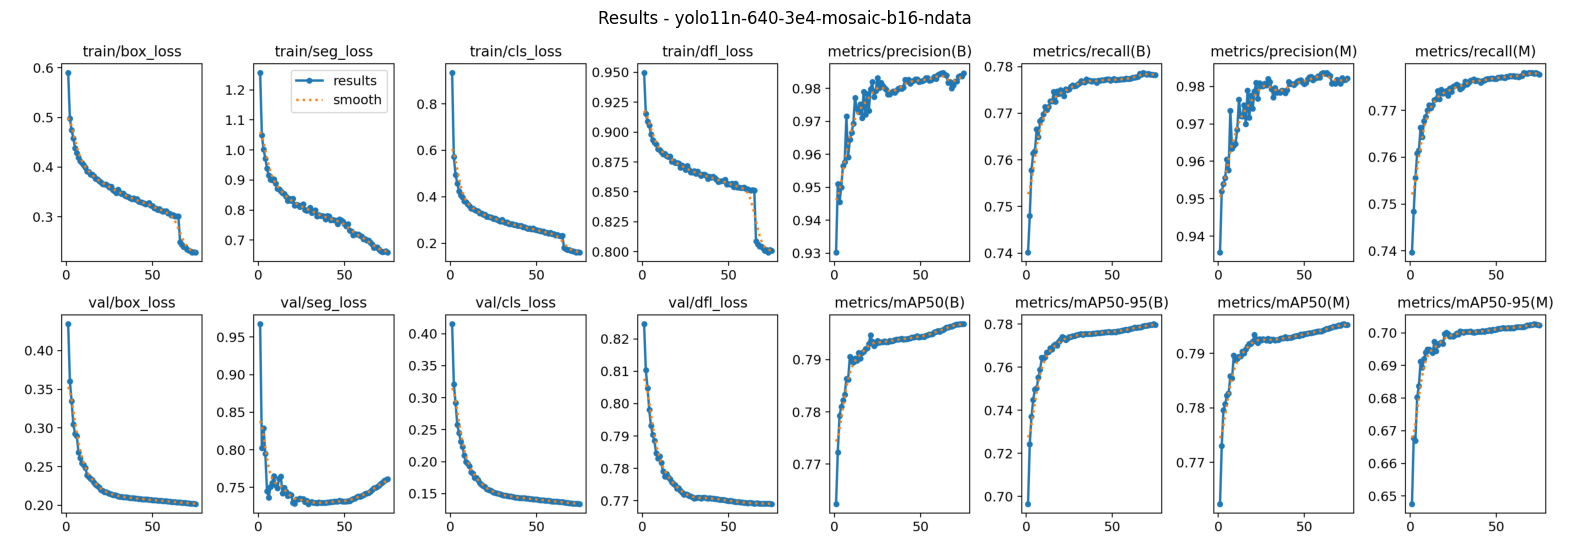

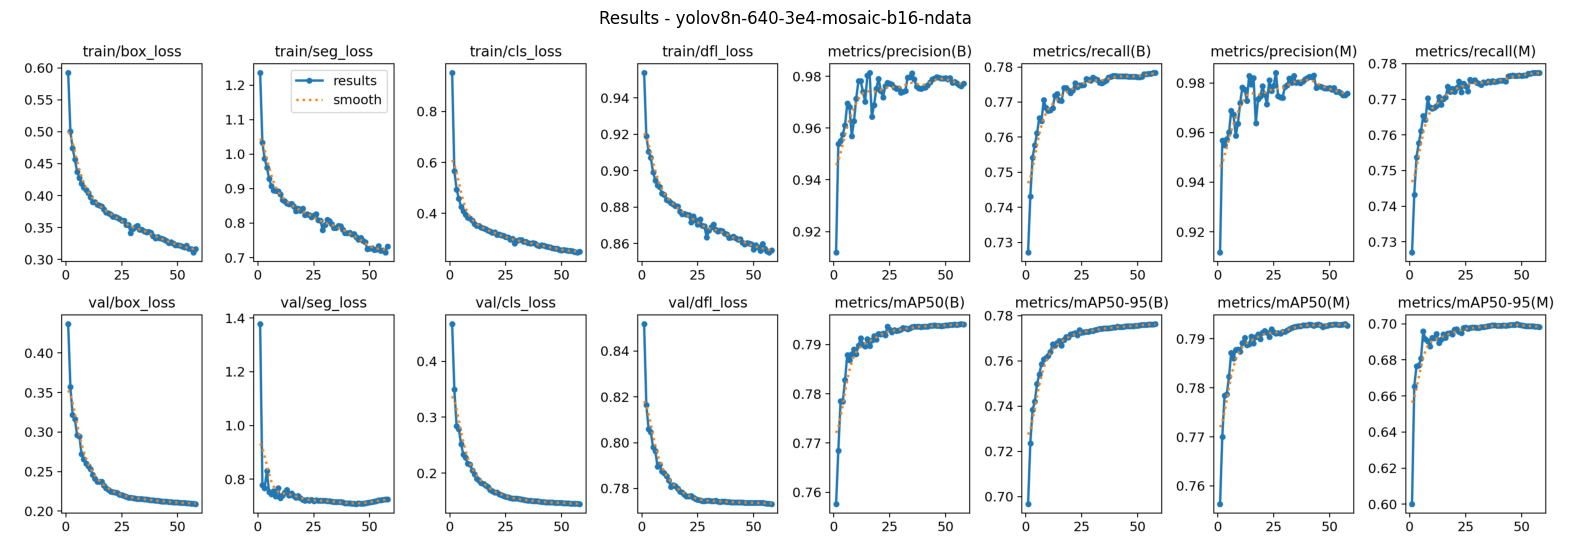

In [10]:
model_name = 'yolo11n-640-3e4-mosaic-b16-ndata'
results_plot(model_name)
model_name = 'yolov8n-640-3e4-mosaic-b16-ndata'
results_plot(model_name)

In [6]:
model = YOLO(r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-adam-flip-640-3e4-mosaic-b16-2\weights\best.pt')


# Evaluate the model
metrics = model.val()  # Returns a dictionary with evaluation metrics

Ultralytics 8.3.96  Python-3.11.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\labels\val.cache... 7613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7613/7613 [00:00<?, ?it/s]Scanning C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\yolo_lp_screen_id\labels\val.cache... 7613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7613/7613 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/476 [00:00<?, ?it/s]

WARNING  Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 1/476 [00:00<05:44,  1.38it/s]

WARNING  Limiting validation plots to first 50 items per image for speed...
WARNING  Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 476/476 [00:58<00:00,  8.18it/s]


                   all       7613      11797      0.989      0.782      0.795      0.783      0.988      0.782      0.795      0.733
         license_plate       3000       3091      0.997       0.97      0.984      0.967      0.997       0.97      0.984      0.827
                screen       1663       5756      0.972      0.378      0.407      0.387      0.968      0.378      0.407      0.379
               id_card       2950       2950      0.999      0.998      0.995      0.995      0.999      0.998      0.995      0.994
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\segment\val5


In [7]:
# Print mAP@0.5 and mAP@0.5:0.95
print(f"mAP50: {metrics.box.map50:.4f}")      # For bounding boxes (if available)
print(f"mAP50-95 (seg): {metrics.seg.map:.4f}")  # For segmentation performance

mAP50: 0.7953
mAP50-95 (seg): 0.7335


In [3]:
# Print mAP@0.5 and mAP@0.5:0.95
print(f"mAP50: {metrics.box.map50:.4f}")      # For bounding boxes (if available)
print(f"mAP50-95 (seg): {metrics.seg.map:.4f}")  # For segmentation performance

mAP50: 0.7972
mAP50-95 (seg): 0.7341


In [5]:
import wandb
wandb.log({"mAP50-95 (seg)": metrics.seg.map, "mAP50 (seg)": metrics.seg.map50})

Error: You must call wandb.init() before wandb.log()

In [6]:
model.export(format='onnx')

Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu124 CPU (AMD Ryzen 7 5800H with Radeon Graphics)

PyTorch: starting from 'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (45.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ---------------------------------------- 14.5/14.5 MB 50.4 MB/s eta 0:00:00
   ---------------------------------------- 142.9/142.9 kB ? eta 0:00:00
   --------------------------------------- 213.1/213.1 MB 54.7 MB/s eta 0:00:00
   ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
   ---------------------------------------- 86.8/86.8 kB ? eta 0:00:00
   ---------------------------------------- 83.2/83.2 kB ? eta 0:00:00

requirements: AutoUpdate success  19.7s, instal

'C:\\Users\\Sai\\Documents\\Neu\\Masters_Project\\PerceptionPrivacy\\instance_segmentation\\yolov8-seg\\privacy-segmentation\\yolov8s-finetune-balanced\\weights\\best.onnx'